In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import time
import itertools
import statsmodels.api as sm
import numpy.ma as ma
from scipy.stats.stats import pearsonr, normaltest
from scipy.spatial.distance import correlation
os.getcwd()
os.chdir(r'C:\Users\Haneef Usmani\Desktop\STAT 303-2\Project')

In [2]:
airlines = pd.read_csv('airlines.csv')
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [3]:
airports = pd.read_csv('airports.csv')
airports.columns = airports.columns.str.lower()
airports

,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [4]:
flights = pd.read_csv('flights.csv')
flights.columns = flights.columns.str.lower()
flights = flights.merge(right=airports, how='left', left_on='origin_airport', right_on='iata_code')
flights

C:\Users\Haneef Usmani\AppData\Local\Temp\ipykernel_12048\3682696113.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,airline_delay,late_aircraft_delay,weather_delay,iata_code,airport,city,state,country,latitude,longitude
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,NaN,NaN,NaN,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,NaN,NaN,NaN,JFK,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,NaN,NaN,NaN,JFK,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,NaN,NaN,NaN,MCO,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603


In [5]:
flights.dtypes

year                     int64
month                    int64
day                      int64
day_of_week              int64
airline                 object
flight_number            int64
tail_number             object
origin_airport          object
destination_airport     object
scheduled_departure      int64
departure_time         float64
departure_delay        float64
taxi_out               float64
wheels_off             float64
scheduled_time         float64
elapsed_time           float64
air_time               float64
distance                 int64
wheels_on              float64
taxi_in                float64
scheduled_arrival        int64
arrival_time           float64
arrival_delay          float64
diverted                 int64
cancelled                int64
cancellation_reason     object
air_system_delay       float64
security_delay         float64
airline_delay          float64
late_aircraft_delay    float64
weather_delay          float64
iata_code               object
airport 

In [6]:
X = flights[flights.columns.difference([
    'departure_delay', # response variable
    'year', # all are 2015
    'flight_number', # irrelevant
    'tail_number', # irrelevant
    'departure_time', # collinearity: scheduled_departure + departure_delay
    'wheels_off', # co: departure_time + taxi_out
    'elapsed_time', # co: scheduled_time + departure_delay
    'air_time', # co: elapsed_time - taxi_out - taxi_in
    'wheels_on', # co: arrival_time - taxi_in
    # leave in arrival_time because of time changes
    'arrival_delay', # co: departure_delay
    'diverted', # occurs after delay, can't be used to predict delay time
    'cancelled', # occurs after delay,
    'cancellation_reason',
    'air_system_delay',
    'security_delay',
    'airline_delay',
    'late_aircraft_delay',
    'weather_delay',
    'iata_code', # same as origin_airport
    'airport', # airport already described in origin_airport
    'country' # all are USA
])]

In [7]:
y = flights.departure_delay

In [8]:
X.head()

,airline,arrival_time,city,day,day_of_week,destination_airport,distance,latitude,longitude,month,origin_airport,scheduled_arrival,scheduled_departure,scheduled_time,state,taxi_in,taxi_out
0,AS,408.0,Anchorage,1,4,SEA,1448,61.17432,-149.99619,1,ANC,430,5,205.0,AK,4.0,21.0
1,AA,741.0,Los Angeles,1,4,PBI,2330,33.94254,-118.40807,1,LAX,750,10,280.0,CA,4.0,12.0
2,US,811.0,San Francisco,1,4,CLT,2296,37.61900,-122.37484,1,SFO,806,20,286.0,CA,11.0,16.0
3,AA,756.0,Los Angeles,1,4,MIA,2342,33.94254,-118.40807,1,LAX,805,20,285.0,CA,8.0,15.0
4,AS,259.0,Seattle,1,4,ANC,1448,47.44898,-122.30931,1,SEA,320,25,235.0,WA,5.0,11.0


In [9]:
y.head()

0   -11.0
1    -8.0
2    -2.0
3    -5.0
4    -1.0
Name: departure_delay, dtype: float64

In [10]:
flights.corrwith(flights.departure_delay).sort_values(ascending=False)

departure_delay        1.000000
arrival_delay          0.944672
airline_delay          0.621296
late_aircraft_delay    0.554802
weather_delay          0.243532
departure_time         0.171723
wheels_off             0.162582
scheduled_departure    0.110149
scheduled_arrival      0.097566
air_system_delay       0.095917
wheels_on              0.058674
taxi_out               0.058515
arrival_time           0.049236
cancelled              0.033099
longitude              0.031857
elapsed_time           0.030805
scheduled_time         0.027799
distance               0.024106
air_time               0.023495
diverted               0.022963
taxi_in                0.012784
security_delay         0.011877
day                   -0.000176
latitude              -0.003755
flight_number         -0.008665
day_of_week           -0.011510
month                 -0.021994
year                        NaN
dtype: float64

In [11]:
model = smf.ols(formula='departure_delay ~ departure_time + taxi_out + longitude + scheduled_time + month + day', data=flights).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        departure_delay   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                 3.179e+04
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:59:48   Log-Likelihood:            -2.6342e+07
No. Observations:             5241724   AIC:                         5.268e+07
Df Residuals:                 5241717   BIC:                         5.268e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.4529      0.116    -64.493      0.000      -7.679      -7.226
departure_time     0.0132   3.24e-05    406.757      0.000       0.013       0.013
taxi_out           0.2114      0.002    116.228      0.000       0.208       0.215
longitude          0.0504      0.001     56.388      0.000       0.049       0.052
scheduled_time     0.0126      0.000     58.678      0.000       0.012       0.013
month             -0.1223      0.005    -25.668      0.000      -0.132      -0.113
day               -0.0005      0.002     -0.277      0.782      -0.004       0.003
==============================================================================
Omnibus:                  7112984.388   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3487783704.842
Skew:                           7.583   Prob(JB):                         0.00
Kurtosis:                     128.456   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
flights.loc[0]

year                                                          2015
month                                                            1
day                                                              1
day_of_week                                                      4
airline                                                         AS
flight_number                                                   98
tail_number                                                 N407AS
origin_airport                                                 ANC
destination_airport                                            SEA
scheduled_departure                                              5
departure_time                                              2354.0
departure_delay                                              -11.0
taxi_out                                                      21.0
wheels_off                                                    15.0
scheduled_time                                               2

In [13]:
# perform forward stepwise selection on the model to predict departure_delay using the dataset X
# X is a pandas dataframe
# y is a pandas series
# returns a list of the selected features
def forward_selection(X, y):
    selected_features = []
    while True:
        remaining_features = list(set(X.columns) - set(selected_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = smf.ols(formula='departure_delay ~ ' + '+'.join(selected_features + [new_column]), data=flights).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < 0.05:
            best_feature = new_pval.idxmin()
            selected_features.append(best_feature)
        else:
            break
    return selected_features



In [14]:
y

0         -11.0
1          -8.0
2          -2.0
3          -5.0
4          -1.0
           ... 
5819074    -4.0
5819075    -4.0
5819076    -9.0
5819077    -6.0
5819078    15.0
Name: departure_delay, Length: 5819079, dtype: float64

In [15]:
# create a subset of the data with all the predictors from X
X_subset = X[X.columns]
X_subset['departure_delay'] = y
X_subset
#remove the departure_delay column from X_subset
X_subset = X_subset[X_subset.columns.difference(['departure_delay'])]

In [16]:
#add the departure_delay column to the end of X
X['departure_delay'] = y

C:\Users\Haneef Usmani\AppData\Local\Temp\ipykernel_12048\2616848850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['departure_delay'] = y


In [17]:
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.ols('np.log(departure_delay)~' + '+'.join(predictor_subset),data = X).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X_subset.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [18]:
# #Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
# models_best = pd.DataFrame(columns=["Rsquared", "model"])

# tic = time.time()
# for i in range(1,1+X_subset.shape[1]):
#     models_best.loc[i] = getBest_model(i)

# toc = time.time()
# print("Total elapsed time:", (toc-tic), "seconds.")

NameError: name 'models_best' is not defined

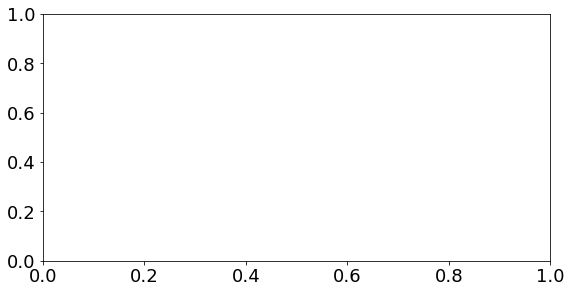

In [19]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()